## import libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import matplotlib.pyplot as plt
from collections import Counter
import string


In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## read data and Concatenate all csv files

In [8]:
# Assuming all CSV files are in the same directory
data_directory = "C:/Users/LENOVO/Downloads/archive/stories/"
csv_files = [file for file in os.listdir(data_directory) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames from each CSV
dfs = []

for file in csv_files:
    file_path = os.path.join(data_directory, file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_data = pd.concat(dfs, ignore_index=True)


In [9]:
combined_data.head()

,Unnamed: 0,id,title,date,author,story,topic
0,0,f06aa998054e11eba66e646e69d991ea,"""بيت الشعر"" يسائل وزير الثقافة عن كوابيس سوداء",الجمعة 02 أكتوبر 2020 - 23:19,هسبريس من الرباط,"وجه ""بيت الشعر في المغرب"" إلى وزير الثقافة وال...",art-et-culture
1,1,f1cf1b9c054e11ebb718646e69d991ea,"مهرجان ""سينما المؤلّف"" يستحضر روح ثريا جبران",الجمعة 02 أكتوبر 2020 - 07:26,هسبريس من الرباط,في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بج...,art-et-culture
2,2,f2d282a4054e11eb800f646e69d991ea,"فيلم ""بدون عنف"" لهشام العسري ..""كعب الحذاء ووا...",الجمعة 02 أكتوبر 2020 - 04:00,عفيفة الحسينات*,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,art-et-culture
3,3,f3f46cac054e11eba403646e69d991ea,"""تنين ووهان"" .. مريم أيت أحمد توقِّع أولى ""روا...",الجمعة 02 أكتوبر 2020 - 02:00,حاورَها: وائل بورشاشن,"مِن قَلب أيّام ""الحَجْر""، رأتِ النّورَ الفصول ...",art-et-culture
4,4,f50f0476054e11eba31b646e69d991ea,"مسكر يتخلّى عن دعم ""الوزارة"" بسبب ""الجمهور""",الخميس 01 أكتوبر 2020 - 19:40,هسبريس من الرباط,أعلن الفنان المغربيّ سعيد مسكر تخليه عن مبلغ ا...,art-et-culture


In [10]:
combined_data.columns

Index(['Unnamed: 0', 'id', 'title', 'date', 'author', 'story', 'topic'], dtype='object')

In [11]:
print(combined_data['story'][0])

وجه "بيت الشعر في المغرب" إلى وزير الثقافة والشباب والرياضة رسالة موسومة بـ"لماذا تحولت أحلام بيضاء إلى كوابيس سوداء؟"، أشار من خلالها إلى أن "بيت الشعر تأسّس سنة 1996 بهدف تحقيق جُملة من الأهداف التي تروم جميعُها تعزيز مكانة الشّعر في المجتمع والحياة وترسيخ مكانته بين الناس كحاملٍ لقيم الحلم والخيال؛ فمن تلك الأهداف توطين الشعر المغربي في المقررات الدراسية وتشجيع التلاميذ والطلبة على قراءته وتذوّق جمالياته، خاصّة في اللحظة التي ينتصرُ فيها لكل ما هو مدهش وإنساني".وجاء في الرسالة، التي توصلت هسبريس بنسخة منها، أن "بيت الشعر نجح في المغرب خلال مسيرته الطويلة التي تمتدّ على مدى ربع قرن في إقناع المنظمة العالمية للتربية والثقافة والعلوم (اليونيسكو) بإحداث يوم عالمي للشعر عن طريق المقترح الذي تقدّم به، والذي تبنته الحكومة المغربية في عهد الراحل عبد الرحمان اليوسفي، كما نجح في ضمان مكانة عالمية لجائزته الشعرية المعروفة "الأركانة" التي صار شعراء العالم يتطلعون للفوز بها، علاوة على انتظام منشوراته الشعرية ومجلته الرصينة "البيت"، واستدامة برامجه الشعرية بالتعاون مع عدد من الشركاء الذين آمنوا ب

## exploratory data analysis

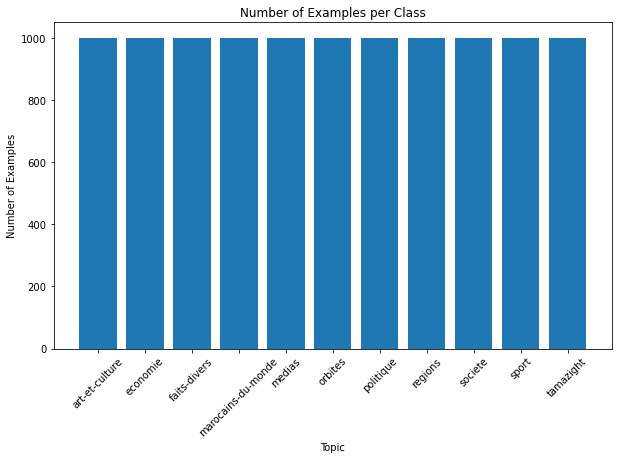

In [19]:
# Create a custom-sized figure
plt.figure(figsize=(10, 6))  # Change the values (width, height) as needed

# Plot number of examples for each class
class_counts = combined_data['topic'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Topic')
plt.ylabel('Number of Examples')
plt.title('Number of Examples per Class')
plt.xticks(rotation=45)

# Display the plot
plt.show()


------------------------------ topic: art-et-culture ------------------------------
****************************************************************************************************
ngram:  (('من', 'خلال'), ('من', 'أجل'), ('إلى', 'أن'), ('في', 'هذا'), ('مجموعة', 'من'), ('العديد', 'من'), ('وهو', 'ما'), ('عدد', 'من'), ('في', 'إطار'), ('في', 'هذه'))


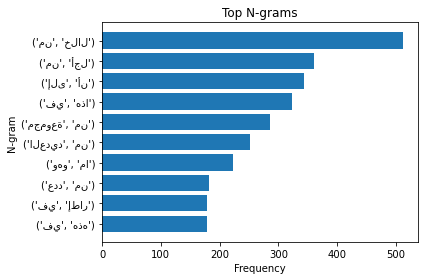

****************************************************************************************************
------------------------------ topic: economie ------------------------------
****************************************************************************************************
ngram:  (('في', 'المائة'), ('إلى', 'أن'), ('من', 'أجل'), ('من', 'خلال'), ('في', 'المائة،'), ('فيروس', 'كورونا'), ('المائة', 'من'), ('وهو', 'ما'), ('من', 'طرف'), ('مليار', 'درهم'))


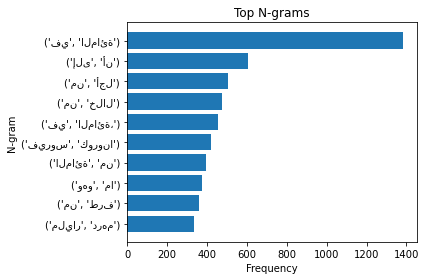

****************************************************************************************************
------------------------------ topic: faits-divers ------------------------------
****************************************************************************************************
ngram:  (('النيابة', 'العامة'), ('من', 'أجل'), ('من', 'العمر'), ('الدرك', 'الملكي'), ('المشتبه', 'فيه'), ('العامة', 'المختصة،'), ('قبل', 'أن'), ('تحت', 'إشراف'), ('تدبير', 'الحراسة'), ('الحراسة', 'النظرية'))


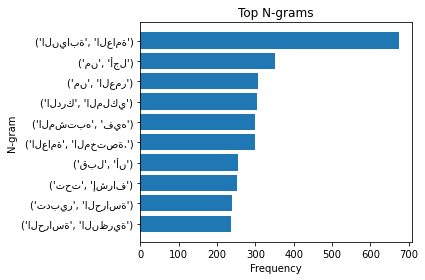

****************************************************************************************************
------------------------------ topic: marocains-du-monde ------------------------------
****************************************************************************************************
ngram:  (('من', 'أجل'), ('الجالية', 'المغربية'), ('إلى', 'أن'), ('من', 'خلال'), ('مغاربة', 'العالم'), ('المغاربة', 'العالقين'), ('في', 'هذا'), ('عدد', 'من'), ('العالقين', 'في'), ('على', 'أن'))


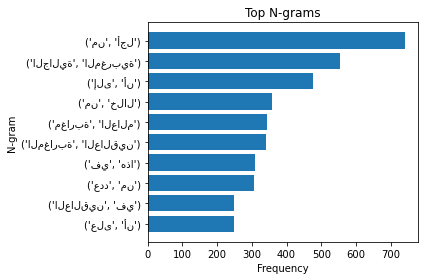

****************************************************************************************************
------------------------------ topic: medias ------------------------------
****************************************************************************************************
ngram:  (('من', 'أجل'), ('أخبار', 'اليوم'), ('إلى', 'أن'), ('الأحداث', 'المغربية'), ('من', 'طرف'), ('من', 'خلال'), ('ذاتها', 'أن'), ('الجريدة', 'أن'), ('وهو', 'ما'), ('عدد', 'من'))


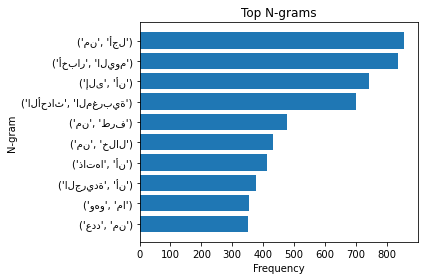

****************************************************************************************************
------------------------------ topic: orbites ------------------------------
****************************************************************************************************
ngram:  (('من', 'أجل'), ('إلى', 'أن'), ('من', 'خلال'), ('في', 'هذا'), ('وهو', 'ما'), ('العديد', 'من'), ('فيروس', 'كورونا'), ('يمكن', 'أن'), ('في', 'إطار'), ('الملك', 'محمد'))


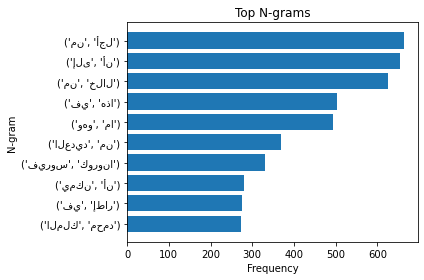

****************************************************************************************************
------------------------------ topic: politique ------------------------------
****************************************************************************************************
ngram:  (('إلى', 'أن'), ('من', 'أجل'), ('على', 'أن'), ('الأمين', 'العام'), ('مشيرا', 'إلى'), ('من', 'خلال'), ('الملك', 'محمد'), ('مجلس', 'النواب'), ('في', 'هذا'), ('وهو', 'ما'))


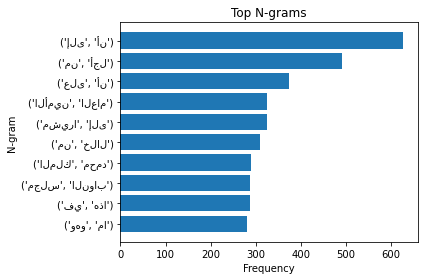

****************************************************************************************************
------------------------------ topic: regions ------------------------------
****************************************************************************************************
ngram:  (('بفيروس', 'كورونا'), ('حالة', 'بإقليم'), ('إلى', 'أن'), ('من', 'أجل'), ('فيروس', 'كورونا'), ('منذ', 'بداية'), ('الدار', 'البيضاء'), ('المديرية', 'الجهوية'), ('كورونا', 'المستجد'), ('من', 'طرف'))


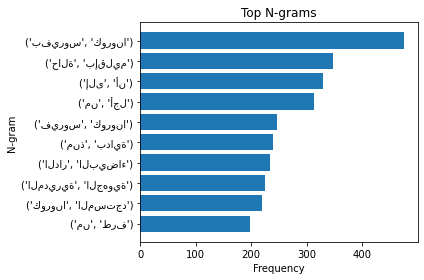

****************************************************************************************************
------------------------------ topic: societe ------------------------------
****************************************************************************************************
ngram:  (('إلى', 'أن'), ('من', 'أجل'), ('وهو', 'ما'), ('في', 'المائة'), ('التربية', 'الوطنية'), ('وزارة', 'الصحة'), ('في', 'تصريح'), ('فيروس', 'كورونا'), ('بفيروس', 'كورونا'), ('على', 'مستوى'))


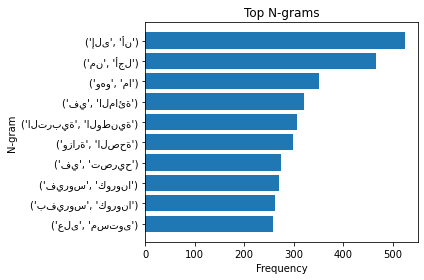

****************************************************************************************************
------------------------------ topic: sport ------------------------------
****************************************************************************************************
ngram:  (('لكرة', 'القدم'), ('لكرة', 'القدم،'), ('فيروس', 'كورونا'), ('إلى', 'أن'), ('الدولي', 'المغربي'), ('من', 'العمر'), ('البالغ', 'من'), ('من', 'أجل'), ('كرة', 'القدم'), ('الملكية', 'المغربية'))


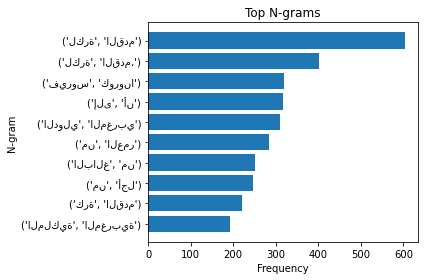

****************************************************************************************************
------------------------------ topic: tamazight ------------------------------
****************************************************************************************************
ngram:  (('من', 'أجل'), ('الأمازيغية', 'في'), ('اللغة', 'الأمازيغية'), ('القانون', 'التنظيمي'), ('الطابع', 'الرسمي'), ('الملكي', 'للثقافة'), ('إلى', 'أن'), ('المعهد', 'الملكي'), ('من', 'خلال'), ('في', 'هذا'))


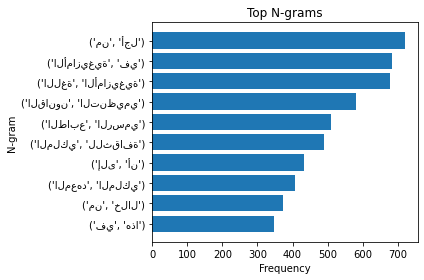

****************************************************************************************************


In [16]:
def preprocess_text(text):
    # Tokenize the text into words
    tokens = word_tokenize(text)
     # Define a list of Arabic punctuation characters
    arabic_punctuation = ['``', '؛',',', 'ـ',"''",".",'،']
    # Combine Arabic and ASCII punctuation characters
    all_punctuation = arabic_punctuation + list(string.punctuation)
    # Remove unwanted punctuation marks
    cleaned_tokens = [token for token in tokens if token not in all_punctuation]

    return cleaned_tokens

def get_ngrams(text, n):
    cleaned_tokens = preprocess_text(text)
    return list(ngrams(cleaned_tokens, n))

def plot_top_ngrams(data, n, top_n=10):
    ngram_counter = Counter()

    for text in data:
        ngrams_list = get_ngrams(text, n)
        ngram_counter.update(ngrams_list)

    top_ngrams = ngram_counter.most_common(top_n)

    ngram_labels, ngram_counts = zip(*top_ngrams)
    print("ngram: ",ngram_labels)
    
    # Convert ngram_counts tuple to list
    ngram_counts = list(ngram_counts)
    
    # Plotting the n-grams
    plt.barh(range(len(ngram_labels)), ngram_counts)
    plt.yticks(range(len(ngram_labels)), ngram_labels)
    plt.xlabel('Frequency')
    plt.ylabel('N-gram')
    plt.title('Top N-grams')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()



# Perform EDA for the entire dataset
n = 2
top_n = 10
# Perform EDA for each class separately 
for topic in combined_data['topic'].unique():
    print("-"*30,f"topic: {topic}", "-"*30)
    print('*'*100)
    plot_top_ngrams(combined_data[combined_data['topic'] == topic]['story'], n, top_n)
    print('*'*100)


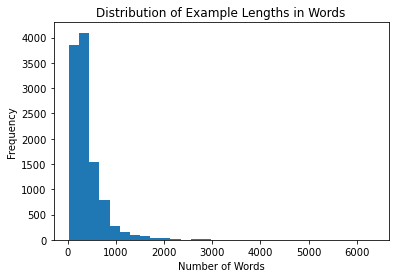

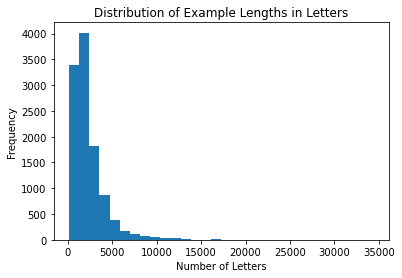

In [14]:
def plot_length_distribution(data, measure):
    if measure == 'words':
        lengths = data.apply(lambda x: len(word_tokenize(x)))
        plt.xlabel('Number of Words')
        plt.title('Distribution of Example Lengths in Words')
    elif measure == 'letters':
        lengths = data.apply(len)
        plt.xlabel('Number of Letters')
        plt.title('Distribution of Example Lengths in Letters')
    else:
        raise ValueError("Invalid measure. Use 'words' or 'letters'.")

    plt.hist(lengths, bins=30)
    plt.ylabel('Frequency')
    plt.show()

# Plot distribution of example lengths in words
plot_length_distribution(combined_data['story'], measure='words')

# Plot distribution of example lengths in letters
plot_length_distribution(combined_data['story'], measure='letters')
